In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

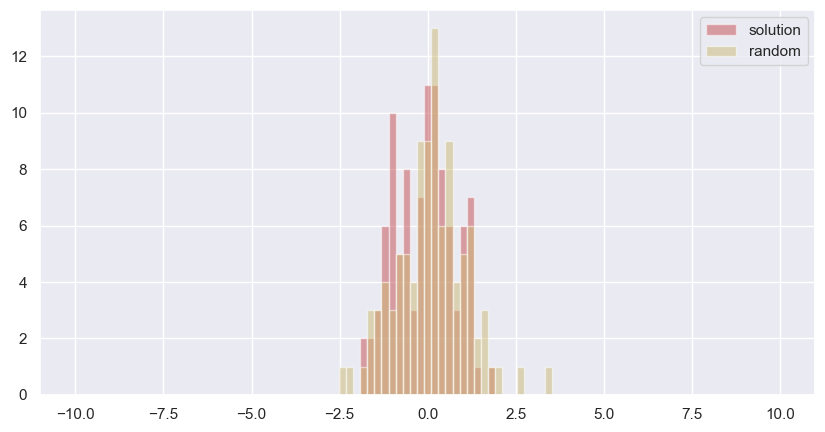

In [5]:
plt.figure(figsize = (10, 5))
bins = np.linspace(-10, 10, 100)

solution = np.random.randn(100)
w = np.random.randn(100)

plt.hist(solution, bins, alpha = 0.5, label = 'solution', color = 'r')
plt.hist(w, bins, alpha = 0.5, label = 'random', color = 'y')
plt.legend()
plt.show()

In [6]:
def f(w):
    return -np.sum(np.square(solution - w))


npop = 50
sigma = 0.1
alpha = 0.001

for i in range(5000):

    if (i + 1) % 1000 == 0:
        print(
            'iter %d. w: %s, solution: %s, reward: %f'
            % (i + 1, str(w[-1]), str(solution[-1]), f(w))
        )
    N = np.random.randn(npop, 100)
    R = np.zeros(npop)
    for j in range(npop):
        w_try = w + sigma * N[j]
        R[j] = f(w_try)

    A = (R - np.mean(R)) / np.std(R)
    w = w + alpha / (npop * sigma) * np.dot(N.T, A)

iter 1000. w: -0.7374111520360396, solution: -1.1857380267159097, reward: -13.149844
iter 2000. w: -1.1705754549559737, solution: -1.1857380267159097, reward: -0.007339
iter 3000. w: -1.1710937529474765, solution: -1.1857380267159097, reward: -0.007490
iter 4000. w: -1.185620493872766, solution: -1.1857380267159097, reward: -0.008810
iter 5000. w: -1.1799596880572796, solution: -1.1857380267159097, reward: -0.007141


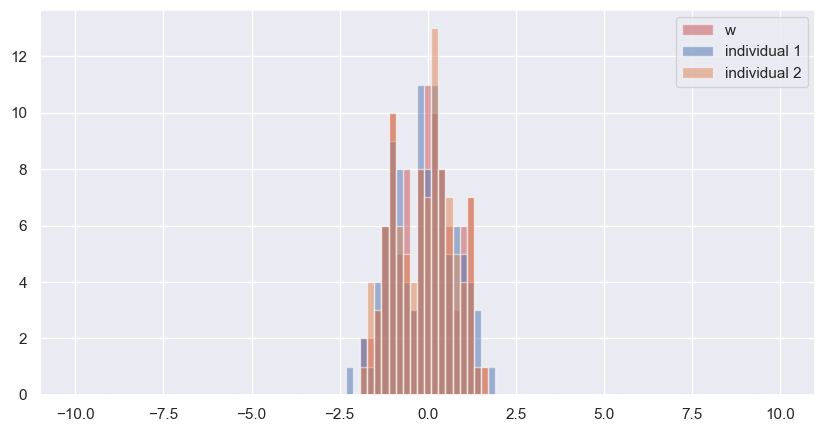

In [7]:
'''
I want to compare my first two individuals with my real w
'''
plt.figure(figsize=(10,5))

sigma = 0.1
N = np.random.randn(npop, 100)
individuals = []
for j in range(2):
    individuals.append(w + sigma * N[j])
    
    
plt.hist(w, bins, alpha=0.5, label='w',color='r')
plt.hist(individuals[0], bins, alpha=0.5, label='individual 1')
plt.hist(individuals[1], bins, alpha=0.5, label='individual 2')
plt.legend()
plt.show()

In [49]:
import pandas as pd
google = pd.read_csv('Data\BAJAJFINSV.csv')
google.head()

,date,close,high,low,open,volume
0,2015-02-02 10:18:00+05:30,144.9,145.4,144.9,144.9,1140
1,2015-02-02 10:19:00+05:30,144.9,144.9,144.9,144.9,0
2,2015-02-02 10:20:00+05:30,144.9,144.9,144.9,144.9,710
3,2015-02-02 10:21:00+05:30,144.6,144.9,144.6,144.9,1020
4,2015-02-02 10:22:00+05:30,145.2,145.2,144.5,144.6,920


In [50]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(google['date'], google['close'], label='Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()
plt.grid(True)
plt.show()


KeyboardInterrupt: 

In [51]:
def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[: t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

In [52]:
close = google.close.values.tolist()
get_state(close, 0, 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [53]:
get_state(close, 1, 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [54]:
get_state(close, 2, 10)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [55]:
class Deep_Evolution_Strategy:
    def __init__(
        self, weights, reward_function, population_size, sigma, learning_rate
    ):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def _get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch = 100, print_every = 1):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self._get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (
                    w
                    + self.learning_rate
                    / (self.population_size * self.sigma)
                    * np.dot(A.T, rewards).T
                )
            if (i + 1) % print_every == 0:
                print(
                    'iter %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')

In [56]:
class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        buy = np.dot(feed, self.weights[2])
        return decision, buy

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [57]:
window_size = 30
model = Model(window_size, 500, 3)

In [58]:
initial_money = 1000
starting_money = initial_money
len_close = len(close) - 1
weight = model
skip = 1

state = get_state(close, 0, window_size + 1)
inventory = []
quantity = 0

max_buy = 5
max_sell = 5


def act(model, sequence):
    decision, buy = model.predict(np.array(sequence))
    return np.argmax(decision[0]), int(buy[0])

has_bought = False
has_sold = True
for t in range(0, len_close, skip):
    action, buy = act(weight, state)
    next_state = get_state(close, t + 1, window_size + 1)
    if action == 1 and initial_money >= close[t]:
        if buy < 0:
            buy = 1
        if buy > max_buy:
            buy_units = max_buy
        else:
            buy_units = buy
        total_buy = buy_units * close[t]
        initial_money -= total_buy
        inventory.append(total_buy)
        quantity += buy_units
        has_bought = True
        has_sold = False
    elif action == 2 and len(inventory) > 0:
        if quantity > max_sell:
            sell_units = max_sell
        else:
            sell_units = quantity
        quantity -= sell_units
        total_sell = sell_units * close[t]
        initial_money += total_sell
        has_bought = False
        has_sold = True

    state = next_state
((initial_money - starting_money) / starting_money) * 100

1029.2550000000106

In [60]:
import time


class Agent:

    POPULATION_SIZE = 15
    SIGMA = 0.1
    LEARNING_RATE = 0.03

    def __init__(
        self, model, money, max_buy, max_sell, close, window_size, skip
    ):
        self.window_size = window_size
        self.skip = skip
        self.close = close
        self.model = model
        self.initial_money = money
        self.max_buy = max_buy
        self.max_sell = max_sell
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision, buy = self.model.predict(np.array(sequence))
        return np.argmax(decision[0]), int(buy[0])

    def get_reward(self, weights):
        initial_money = self.initial_money
        starting_money = initial_money
        len_close = len(self.close) - 1

        self.model.weights = weights
        state = get_state(self.close, 0, self.window_size + 1)
        inventory = []
        quantity = 0
        has_bought = False 
        has_sold = True# Track if a buy action has occurred
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            
            # Restrict actions based on whether a buy has occurred
            if action == 1 and initial_money >= self.close[t] and has_sold:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                has_bought = True
                has_sold = False# Set to True after buying

            elif action == 2 and has_bought and len(inventory) > 0:
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell
                has_bought = False# Reset after selling
                has_sold = True

            state = next_state
        return ((initial_money - starting_money) / starting_money) * 100


    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        initial_money = self.initial_money
        len_close = len(self.close) - 1
        state = get_state(self.close, 0, self.window_size + 1)
        starting_money = initial_money
        states_sell = []
        states_buy = []
        inventory = []
        quantity = 0
        has_bought = False
        has_sold = True# Set to True after buying
        for t in range(0, len_close, self.skip):
            action, buy = self.act(state)
            next_state = get_state(self.close, t + 1, self.window_size + 1)
            if action == 1 and initial_money >= self.close[t] and has_sold:
                if buy < 0:
                    buy = 1
                if buy > self.max_buy:
                    buy_units = self.max_buy
                else:
                    buy_units = buy
                total_buy = buy_units * self.close[t]
                initial_money -= total_buy
                inventory.append(total_buy)
                quantity += buy_units
                states_buy.append(t)
                print(
                    'day %d: buy %d units at price %f, total balance %f'
                    % (t, buy_units, total_buy, initial_money)
                )
                has_bought = True
                has_sold = False# Set to True after buying
            elif action == 2 and len(inventory) > 0 and has_bought:
                bought_price = inventory.pop(0)
                if quantity > self.max_sell:
                    sell_units = self.max_sell
                else:
                    sell_units = quantity
                if sell_units < 1:
                    continue
                quantity -= sell_units
                total_sell = sell_units * self.close[t]
                initial_money += total_sell
                states_sell.append(t)
                try:
                    invest = ((total_sell - bought_price) / bought_price) * 100
                except:
                    invest = 0
                print(
                    'day %d, sell %d units at price %f, investment %f %%, total balance %f,'
                    % (t, sell_units, total_sell, invest, initial_money)
                )
                has_bought = False
                has_sold = True# Set to True after buying
            state = next_state

        invest = ((initial_money - starting_money) / starting_money) * 100
        print(
            '\ntotal gained %f, total investment %f %%'
            % (initial_money - starting_money, invest)
        )
        plt.figure(figsize = (20, 10))
        plt.plot(close, label = 'true close', c = 'g')
        plt.plot(
            close, 'X', label = 'predict buy', markevery = states_buy, c = 'b'
        )
        plt.plot(
            close, 'o', label = 'predict sell', markevery = states_sell, c = 'r'
        )
        plt.legend()
        plt.show()

In [61]:
model = Model(input_size = window_size, layer_size = 500, output_size = 3)
agent = Agent(
    model = model,
    money = 10000,
    max_buy = 1,
    max_sell = 1,
    close = close,
    window_size = window_size,
    skip = 1,
)

In [62]:
agent.fit(iterations = 2000, checkpoint = 10)

KeyboardInterrupt: 

day 3: buy 1 units at price 1277.810059, total balance 8722.189941
day 5, sell 1 units at price 1292.079956, investment 1.116746 %, total balance 10014.269897,
day 8: buy 1 units at price 1289.089966, total balance 8725.179931
day 10, sell 1 units at price 1308.040039, investment 1.470035 %, total balance 10033.219970,
day 11: buy 1 units at price 1314.500000, total balance 8718.719970
day 13, sell 1 units at price 1316.000000, investment 0.114112 %, total balance 10034.719970,
day 16: buy 1 units at price 1318.430054, total balance 8716.289916
day 18, sell 1 units at price 1313.010010, investment -0.411098 %, total balance 10029.299926,
day 21: buy 1 units at price 1325.540039, total balance 8703.759887
day 22, sell 1 units at price 1344.900024, investment 1.460536 %, total balance 10048.659911,
day 27: buy 1 units at price 1342.640015, total balance 8706.019896
day 32, sell 1 units at price 1361.229980, investment 1.384583 %, total balance 10067.249876,
day 34: buy 1 units at price 1

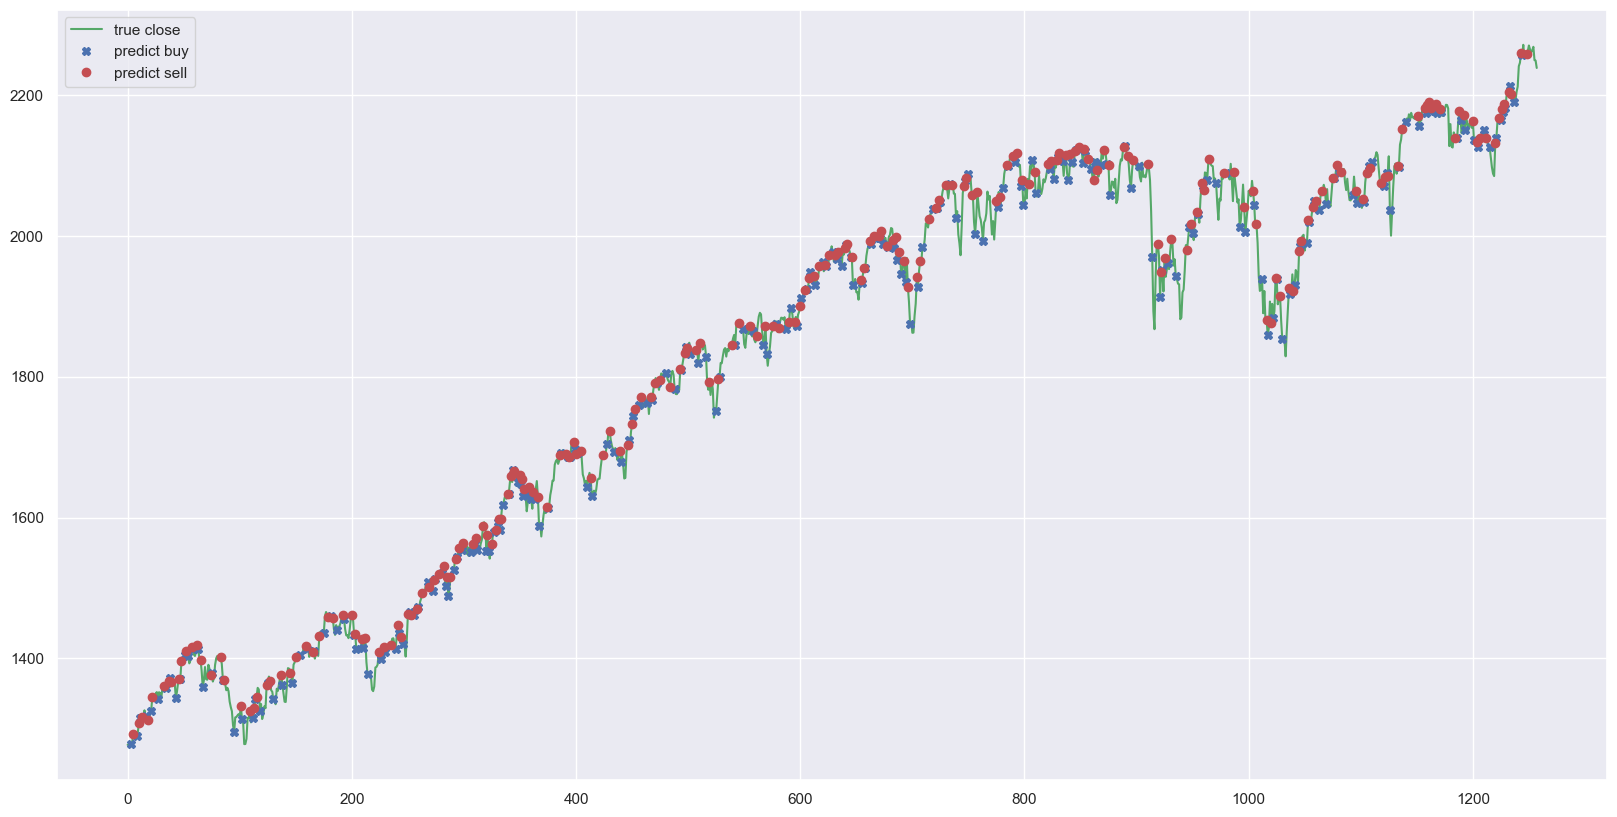

In [48]:
agent.buy()